## Title - Predicting House sale Prices with Advanced Regression Techniques using Random Forest, XGBoost, CatBoost, and Gradient Boosting

- Author: [Muhammad Haroon ul Hasnain](https://www.kaggle.com/haroon669)
- Linkedin: [Muhammad Haroon ul Hasnain](https://www.linkedin.com/in/muhammad-haroon-ul-hasnain/)
- Github: [hasnain1669](https://github.com/hasnain1669)
- Kaggle: [haroon669](https://www.kaggle.com/haroon669)
- Twitter: [hasnain669](https://twitter.com/hasnain1669)\
`Date:` 29 Jan 2024\
`Dataset:` [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/)

This notebook is a comprehensive guide to predict house prices using advanced regression techniques. The dataset is taken from Kaggle competition [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/). The dataset contains 79 explanatory variables describing (almost) every aspect of residential homes. The goal is to predict the final price of each home.

### Dataset Description
### File descriptions
- train.csv - the training set
- test.csv - the test set
- data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
- sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms
#### Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

##### Objective
It is required to predict the sales price for each house. For each Id in the test set, must predict the value of the SalePrice variable.

##### Metric
Submissions are assessed using the Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs implies that errors in estimating expensive and cheap properties will have an equal impact on the outcome.)

In [2]:
# Import the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from scipy import stats
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# import the dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [4]:
# having a look at the dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
# Dataset shape
print(f"This dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns in the dataset.")
print(f"This dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns in the dataset.")

This dataset has 1460 rows and 81 columns in the dataset.
This dataset has 1459 rows and 80 columns in the dataset.


In [7]:
# Dataset info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# Let's explore the missing values
df_train.isnull().sum().sort_values(ascending=False) / len(df_train) * 100

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [9]:
df_train.isnull().sum()[df_train.isnull().sum() > 0].index.tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

<Axes: >

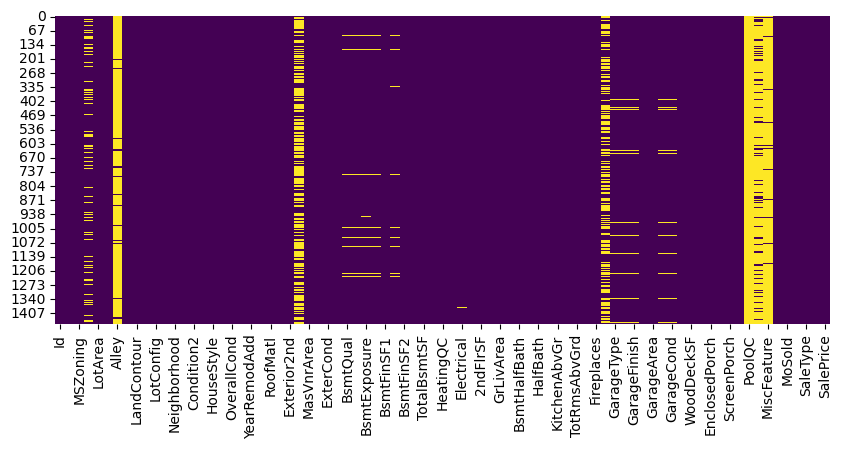

In [10]:
# heatmap to visualize the missing values
plt.figure(figsize=(10, 4))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')

In [11]:
# Dropping the columns with more than 50% missing values
df_train.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'], axis=1, inplace=True)

In [12]:
num_cols_with_null = df_train.select_dtypes(include=['number']).columns[df_train.select_dtypes(include=['number']).isnull().any()]
num_cols_with_null

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [13]:
cat_cols_with_null = df_train.select_dtypes(exclude=['number']).columns[df_train.select_dtypes(exclude=['number']).isnull().any()]
cat_cols_with_null

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [14]:
# Descriptive statistics
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
# Dropping the 'Id' column
df_train.drop('Id', axis=1, inplace=True)

In [24]:
# Let's check agian the missing values
print(df_train.isnull().sum()[df_train.isnull().sum() /len(df_train) * 100 > 0])

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


Text(0.5, 0.98, 'Correlation between numerical features and Sales Price')

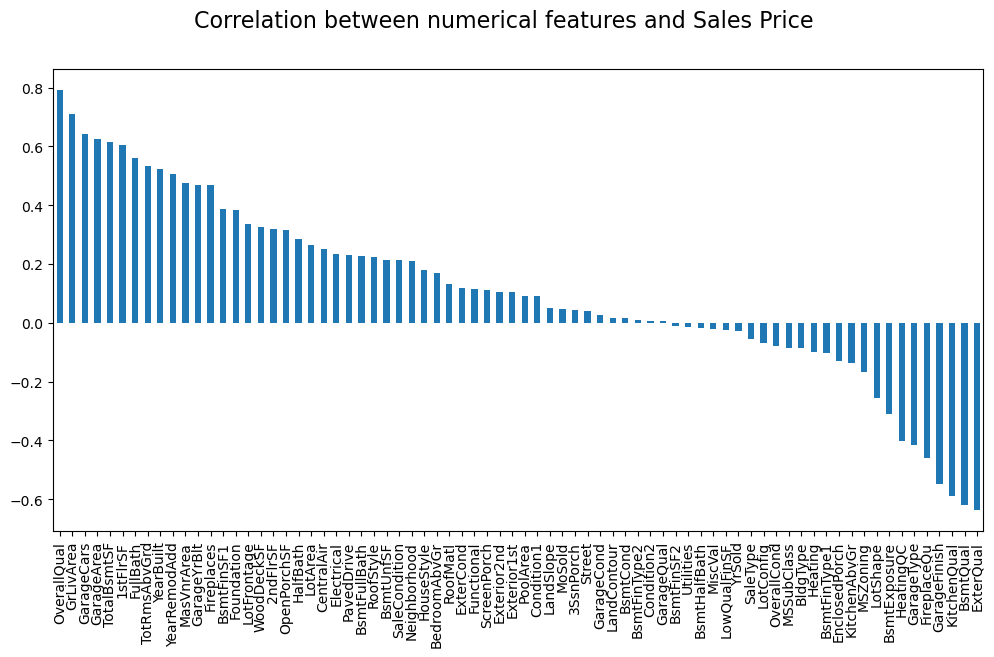

In [42]:
#Show Numerical features correlation with sales price
plt.figure(figsize=(12, 6))
df_train.select_dtypes(include=[np.number]).corr()['SalePrice'].sort_values(ascending = False).drop('SalePrice').plot(kind = 'bar')
plt.suptitle('Correlation between numerical features and Sales Price', fontsize=16)

In [46]:
from sklearn.impute import SimpleImputer
numeric_columns = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]  
numeric_imputer = SimpleImputer(strategy='mean')

df_train[numeric_columns] = numeric_imputer.fit_transform(df_train[numeric_columns])
df_test[numeric_columns] = numeric_imputer.transform(df_test[numeric_columns])

In [47]:
from sklearn.preprocessing import LabelEncoder
Object1_columns = df_train.select_dtypes(include=['object']).columns
Object2_columns = df_test.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for column in Object1_columns:
    print(column)
    df_train[column] = label_encoder.fit_transform(df_train[column])

for column in Object2_columns:
    print(column)
    df_test[column] = label_encoder.fit_transform(df_test[column])

#### Observations of the dataset 
- The dataset is not clean, it has missing values, and categorical variables.